# 6.5 Unsupervised Machine Learning: Clustering

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('C:/Users/Kid/Desktop/Achievement 6/Data/Prepared Data/imdb_movies_cleaned_v3.csv', index_col=[0])

In [3]:
df.head()

title release_date  score  \
0                    Creed III   2023-03-02   73.0   
1     Avatar: The Way of Water   2022-12-15   78.0   
2  The Super Mario Bros. Movie   2023-04-05   76.0   
3                      Mummies   2023-01-05   70.0   
4                    Supercell   2023-03-17   61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                                crew     status  \
0  Michael B. Jordan, Adonis Creed, Tessa Thompso...   Released   
1  Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...   Released   
2  Chris Pratt, Mario (voice), Anya Taylor-Joy, P...   Released   
3  Óscar Barberán, Thut (voice), Ana Esther Albor...   Released   
4  Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...   Released   

             languages       budget       revenue  ...  \
0              English   75000000.0  2.716167e+08  ...   
1              English  460000000.0  2.316795e+09  ...   
2              English  100000000.0  7.244590e+08  ...   
3   Spanish, Castilian   12300000.0  3.420000e+07  ...   
4              English   77000000.0  3.409420e+08  ...   

                    country rating    primary_genre revenue_in_mil  \
0                 Australia   High            Drama         271.62   
1                 Australia   High  Science Fiction        2316.79   
2                 Australia   High        Animation         724.46   
3                 Australia   High        Animation          34.20   
4  United States of America    Mid           Action         340.94   

   budget_in_mil  budget_tier profitability  gross_profit   profit_tier   ROI  
0           75.0    High-tier          True        196.62   High profit  2.62  
1          460.0     Top-tier          True       1856.79  Giant profit  4.04  
2          100.0    High-tier          True        624.46  Giant profit  6.24  
3           12.3     Mid-tier          True         21.90    Low profit  1.78  
4           77.0    High-tier          True        263.94   High profit  3.43  

[5 rows x 21 columns]

In [4]:
df.shape

(9349, 21)

## Preparing Data for Clustering

In [5]:
#creating a subset of numerical variables only
df_sub = df[['score', 'revenue_in_mil', 'budget_in_mil', 'gross_profit', 'ROI']]

In [6]:
#checking output
df_sub.head()

score  revenue_in_mil  budget_in_mil  gross_profit   ROI
0   73.0          271.62           75.0        196.62  2.62
1   78.0         2316.79          460.0       1856.79  4.04
2   76.0          724.46          100.0        624.46  6.24
3   70.0           34.20           12.3         21.90  1.78
4   61.0          340.94           77.0        263.94  3.43

In [7]:
#normalizing data for clustering correctness
from sklearn.preprocessing import normalize
df_normalized = pd.DataFrame(normalize(df_sub), columns=df_sub.columns)

In [8]:
#checking output
df_normalized.head()

score  revenue_in_mil  budget_in_mil  gross_profit       ROI
0  0.207811        0.773229       0.213505      0.559724  0.007458
1  0.025953        0.770856       0.153054      0.617802  0.001344
2  0.078783        0.750985       0.103661      0.647323  0.006468
3  0.854950        0.417704       0.150227      0.267477  0.021740
4  0.137938        0.770959       0.174118      0.596841  0.007756

## Applying Elbow Technique

In [9]:
#defining potential custer range
num_col = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_col]

In [10]:
#creating score for evaluating variance rate of clusters
score = [kmeans[i].fit(df_normalized).score(df_normalized) for i in range(len(kmeans))]

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

In [11]:
#checking output
score

[-3087.64021413908,
 -1017.987458990249,
 -745.0857424549392,
 -572.6192318720052,
 -474.4864885318465,
 -392.84794940584396,
 -329.5176692317684,
 -280.6917290383169,
 -248.46279976444004]

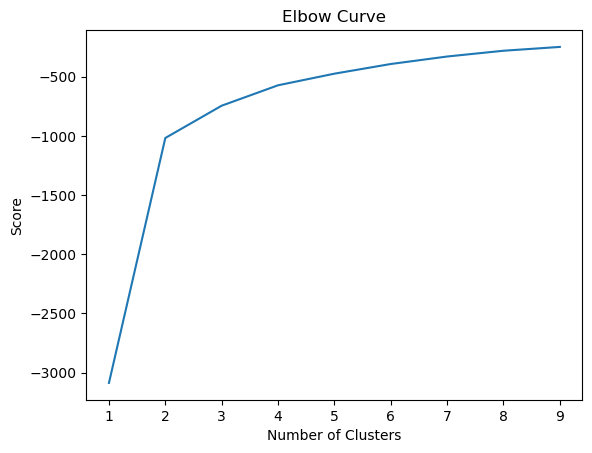

In [12]:
#visualizing culsters variance rate
plt.plot(num_col,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Observation: 
>> #### Elbow suggest 3 number of clusters for the data.

## K-Means Clustering

In [13]:
#creating k-means object
kmeans = KMeans(n_clusters = 3)

In [14]:
#fitting k-means object to data
kmeans.fit(df_normalized)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
#adding clusters column to dataframe
df_sub['clusters'] = kmeans.fit_predict(df_normalized)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Kid\AppData\Local\Temp\ipykernel_2932\169672362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_normalized)


In [16]:
#checking output
df_sub.head()

score  revenue_in_mil  budget_in_mil  gross_profit   ROI  clusters
0   73.0          271.62           75.0        196.62  2.62         0
1   78.0         2316.79          460.0       1856.79  4.04         0
2   76.0          724.46          100.0        624.46  6.24         0
3   70.0           34.20           12.3         21.90  1.78         2
4   61.0          340.94           77.0        263.94  3.43         0

In [17]:
df_sub['clusters'].value_counts(dropna=False)

clusters
0    4888
1    2459
2    2002
Name: count, dtype: int64

Text(0, 0.5, 'revenue (in mil)')

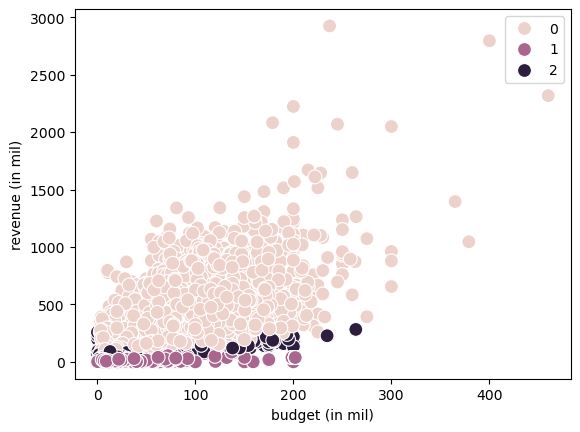

In [18]:
#plotting the clusters for "budget_in_mil" and "revenue_in_mil" variables.
ax = sns.scatterplot(x=df_sub['budget_in_mil'], y=df_sub['revenue_in_mil'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_xlabel('budget (in mil)')
ax.set_ylabel('revenue (in mil)')

Text(0, 0.5, 'revenue (in mil)')

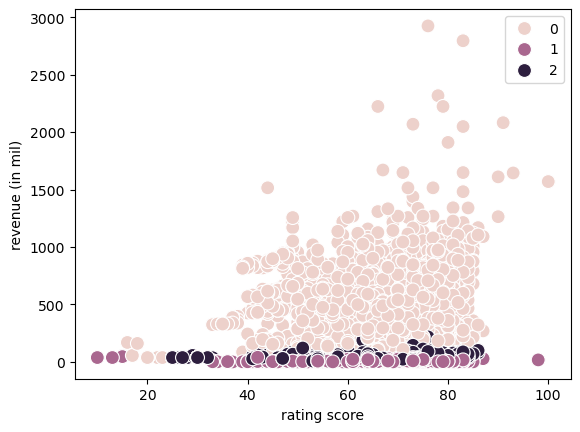

In [19]:
#plotting the clusters for "revenue_in_mil" and "score" variables.
ax = sns.scatterplot(x=df_sub['score'], y=df_sub['revenue_in_mil'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_xlabel('rating score')
ax.set_ylabel('revenue (in mil)')

In [20]:
#relabeling clusters
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Kid\AppData\Local\Temp\ipykernel_2932\3566438834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [21]:
#checking statistic summary
df_sub.groupby('cluster').agg({'budget_in_mil':['mean', 'median'], 
                         'score':['mean', 'median'], 
                         'revenue_in_mil':['mean', 'median']})

budget_in_mil             score        revenue_in_mil         
                     mean median       mean median           mean   median
cluster                                                                   
dark purple     29.694990   19.3  65.587413   66.0      64.989236   57.640
pink            93.515307   95.8  64.822831   66.0     433.485395  389.595
purple          22.338869   13.0  64.506303   65.0      11.410313    7.760

#### Observation:
>> #### The Kmeans algorithm appears to cluster the datapoints based on revenue range, i.e. low/mid/high range, however, the plots show no systematic patterns or trends among these datapoints. This could be attributed to the number of extreme and/or incorrect values present in the data which sets a major drawback in terms of data accuracy and correctness.

>> #### The statistical summary still show us the relationship between the budget and revenue variables, where the dark purple cluster, for instance, denotes movies with the least amounts of budget and revenue on average, while the pink cluster denotes  movies with the highest budgets and revenues on average. 
>> #### Generally speaking, the data shows that movies with higher budget tend to perform much better overall, i.e generate much higher revenues on average than movies with lower budgets.

>> #### The rating score doesn't seem to be affected by either variables judging by its average and median values for each cluster. 

#### Plotting different variables

Text(0, 0.5, 'rating score')

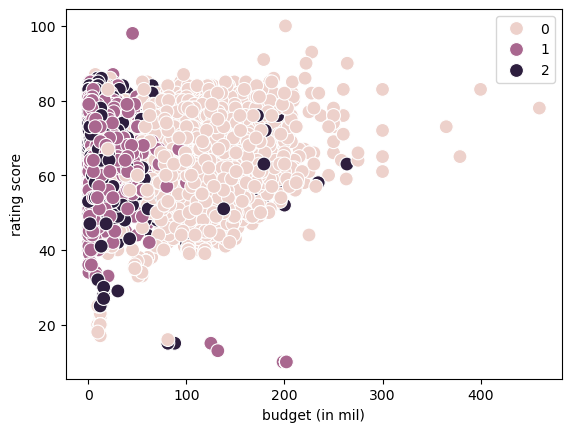

In [22]:
#plotting the clusters for "score" and "budget_in_mil" variables.
ax = sns.scatterplot(x=df_sub['budget_in_mil'], y=df_sub['score'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_xlabel('budget (in mil)')
ax.set_ylabel('rating score')

Text(0, 0.5, 'rating score')

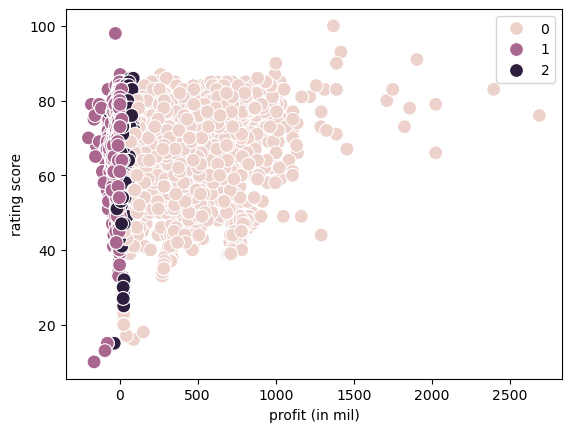

In [23]:
#plotting the clusters for "score" and "gross_profit" variables.
ax = sns.scatterplot(x=df_sub['gross_profit'], y=df_sub['score'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_xlabel('profit (in mil)')
ax.set_ylabel('rating score')

#### Future Steps:

>> #### Turn our attention to other factors that may contribute to higher revenue generation such as genres, actors, etc.
>> #### Answering remaining questions.